<a href="https://colab.research.google.com/github/ChristianRavindu/ChristianRavindu/blob/main/Phising_Email_New_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the phishing dataset
phishing_data = pd.read_csv('/content/drive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

# Display basic info to understand structure
phishing_data.info()
phishing_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Email ID             497 non-null    object
 1   Timestamp            511 non-null    object
 2   Sender Email         500 non-null    object
 3   Recipient Email      500 non-null    object
 4   Subject              500 non-null    object
 5   Email Body           498 non-null    object
 6   Label                506 non-null    object
 7   IP Address           511 non-null    object
 8   Location             494 non-null    object
 9   Sender Domain        500 non-null    object
 10  Recipient Domain     500 non-null    object
 11  Email Length         512 non-null    object
 12  Attachments          504 non-null    object
 13  Link Count           507 non-null    object
 14  Suspicious Keywords  520 non-null    object
 15  Sector               499 non-null    object
dtypes: objec

,Email ID,Timestamp,Sender Email,Recipient Email,Subject,Email Body,Label,IP Address,Location,Sender Domain,Recipient Domain,Email Length,Attachments,Link Count,Suspicious Keywords,Sector
0,bd510c2e-e9ea-432c-a171-6a83b79e65d7,32:22.4,otyler@protonmail.com,sarahkemp@protonmail.com,National man although for sell thought star.,Indeed government born happen. Realize last be...,Legitimate,208.190.144.153,Juantown,protonmail.com,protonmail.com,96,2,6,"click, urgent",Healthcare
1,73dfe436-8485-49f0-9635-8538046c6295,36:26.4,nicole77@outlook.com,pkelly@yahoo.com,World matter eat year agent soldier energy.,Over treatment agree contain style. Hospital c...,Phishing,8.210.9.207,New Justin,outlook.com,yahoo.com,222,1,4,"click, secure",Retail
2,2aad94e0-da9b-437c-be61-49667db5d762,06:52.9,daniellesoto@gmail.com,mferrell@protonmail.com,Financial responsibility attack.,Lose offer create develop well apply today mou...,Phishing,59.219.62.29,Knoxville,gmail.com,protonmail.com,132,2,0,confirm,Error
3,b4fca1ca-22af-4f15-bfee-e7d7adf159e3,27:21.0,mathissean@yahoo.com,patrickgarcia@aol.com,Night show either various group young.,Discuss offer method. Memory while make. Amoun...,Phishing,213.99.88.75,East Andreaton,yahoo.com,aol.com,119,2,0,"account, update",Retail
4,4a3461a1-6535-42ce-991d-13adf28b8e52,34:03.8,morrishannah@aol.com,vchavez@icloud.com,Error,Movie kitchen health kind which policy. Civil ...,Phishing,90.196.229.178,South Elizabethbury,aol.com,icloud.com,132,2,7,"urgent, verify",Retail


In [4]:
# Check for missing values
print("Missing values per column:")
print(phishing_data.isnull().sum())

# Fill missing values or drop rows if needed (example: fill with forward fill)
phishing_data.fillna(method='ffill', inplace=True)

# Verify cleaning
print("Remaining missing values:")
print(phishing_data.isnull().sum())

# View cleaned data
phishing_data.head()


Missing values per column:
Email ID               23
Timestamp               9
Sender Email           20
Recipient Email        20
Subject                20
Email Body             22
Label                  14
IP Address              9
Location               26
Sender Domain          20
Recipient Domain       20
Email Length            8
Attachments            16
Link Count             13
Suspicious Keywords     0
Sector                 21
dtype: int64
Remaining missing values:
Email ID               0
Timestamp              0
Sender Email           0
Recipient Email        0
Subject                0
Email Body             0
Label                  0
IP Address             0
Location               0
Sender Domain          0
Recipient Domain       0
Email Length           0
Attachments            0
Link Count             0
Suspicious Keywords    0
Sector                 0
dtype: int64


<ipython-input-4-cf4b136f1c1c>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  phishing_data.fillna(method='ffill', inplace=True)


,Email ID,Timestamp,Sender Email,Recipient Email,Subject,Email Body,Label,IP Address,Location,Sender Domain,Recipient Domain,Email Length,Attachments,Link Count,Suspicious Keywords,Sector
0,bd510c2e-e9ea-432c-a171-6a83b79e65d7,32:22.4,otyler@protonmail.com,sarahkemp@protonmail.com,National man although for sell thought star.,Indeed government born happen. Realize last be...,Legitimate,208.190.144.153,Juantown,protonmail.com,protonmail.com,96,2,6,"click, urgent",Healthcare
1,73dfe436-8485-49f0-9635-8538046c6295,36:26.4,nicole77@outlook.com,pkelly@yahoo.com,World matter eat year agent soldier energy.,Over treatment agree contain style. Hospital c...,Phishing,8.210.9.207,New Justin,outlook.com,yahoo.com,222,1,4,"click, secure",Retail
2,2aad94e0-da9b-437c-be61-49667db5d762,06:52.9,daniellesoto@gmail.com,mferrell@protonmail.com,Financial responsibility attack.,Lose offer create develop well apply today mou...,Phishing,59.219.62.29,Knoxville,gmail.com,protonmail.com,132,2,0,confirm,Error
3,b4fca1ca-22af-4f15-bfee-e7d7adf159e3,27:21.0,mathissean@yahoo.com,patrickgarcia@aol.com,Night show either various group young.,Discuss offer method. Memory while make. Amoun...,Phishing,213.99.88.75,East Andreaton,yahoo.com,aol.com,119,2,0,"account, update",Retail
4,4a3461a1-6535-42ce-991d-13adf28b8e52,34:03.8,morrishannah@aol.com,vchavez@icloud.com,Error,Movie kitchen health kind which policy. Civil ...,Phishing,90.196.229.178,South Elizabethbury,aol.com,icloud.com,132,2,7,"urgent, verify",Retail


In [7]:

# Check the data duplication
duplicates = phishing_data.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 16


In [9]:
df_dropdupli= phishing_data.drop_duplicates()

In [12]:
# Check the data duplication
duplicates = df_dropdupli.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 0


In [19]:
# Assuming you have already converted the relevant columns
columns_to_convert = ['Email Length', 'Link Count']  # Specify the columns you converted

# Check for NaN values after conversion
print(phishing_data[columns_to_convert].isnull().sum())

# Handle NaN values using .loc to avoid SettingWithCopyWarning
for column in columns_to_convert:
    phishing_data.loc[phishing_data[column].isnull(), column] = 0  # Replace NaNs with 0

# Now you can safely calculate the IQR
Q1 = phishing_data['Email Length'].quantile(0.25)  # For Email Length
Q3 = phishing_data['Email Length'].quantile(0.75)
IQR = Q3 - Q1

print(f"IQR for Email Length: {IQR}")

Email Length    1
Link Count      4
dtype: int64
IQR for Email Length: 80.0


In [21]:
# Check for missing values
phishing_data.isnull().sum()
# Example approach to fill or drop missing values
phishing_data.fillna(method='ffill', inplace=True)


<ipython-input-21-e93ac7e90d9d>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  phishing_data.fillna(method='ffill', inplace=True)


In [22]:
pip install imbalanced-learn

In [23]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load your phishing dataset (uncomment and modify the file path as needed)
# phishing_data = pd.read_csv('your_phishing_data.csv')

# Check the first few rows of the dataset
print("Original Dataset Preview:")
print(phishing_data.head())

# Remove rows with 'Error' in the 'Label' column
phishing_data = phishing_data[phishing_data['Label'] != 'Error']

# Define the target variable and feature set
y = phishing_data['Label']  # Target column
X = phishing_data.drop(columns=['Label'])  # All other columns are features

# Check the original class distribution
print("Original class distribution:", Counter(y))

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert non-numeric columns to numeric using Label Encoding
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])  # Apply label encoding
    label_encoders[column] = le  # Store the encoder if you need to inverse transform later

# Apply SMOTE to the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['Label'] = y_resampled

# Check the new class distribution
print("New class distribution:", Counter(balanced_data['Label']))

# Now you can use 'balanced_data' for your further analysis or modeling


Original Dataset Preview:
                               Email ID Timestamp            Sender Email  \
0  bd510c2e-e9ea-432c-a171-6a83b79e65d7   32:22.4   otyler@protonmail.com   
1  73dfe436-8485-49f0-9635-8538046c6295   36:26.4    nicole77@outlook.com   
2  2aad94e0-da9b-437c-be61-49667db5d762   06:52.9  daniellesoto@gmail.com   
3  b4fca1ca-22af-4f15-bfee-e7d7adf159e3   27:21.0    mathissean@yahoo.com   
4  4a3461a1-6535-42ce-991d-13adf28b8e52   34:03.8    morrishannah@aol.com   

            Recipient Email                                       Subject  \
0  sarahkemp@protonmail.com  National man although for sell thought star.   
1          pkelly@yahoo.com   World matter eat year agent soldier energy.   
2   mferrell@protonmail.com              Financial responsibility attack.   
3     patrickgarcia@aol.com        Night show either various group young.   
4        vchavez@icloud.com                                         Error   

                                          Email 

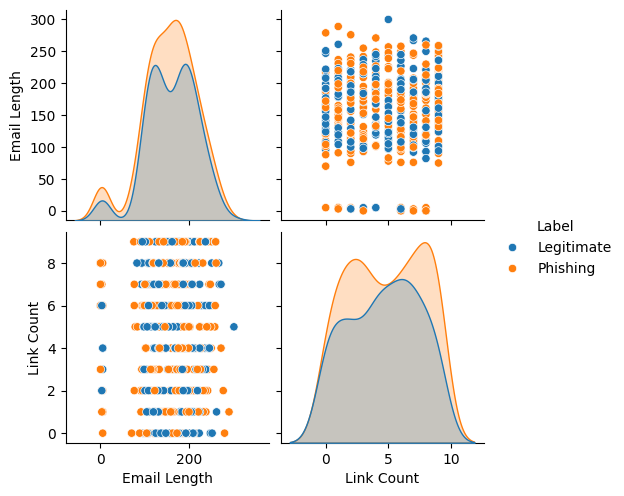

In [24]:
sns.pairplot(phishing_data, hue='Label')
plt.show()

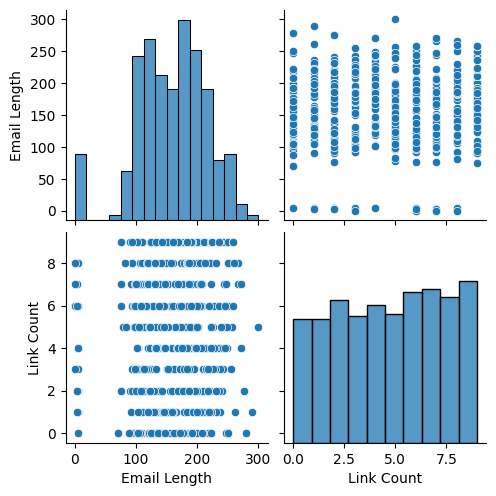

In [27]:
sns.pairplot(phishing_data)
plt.show()

In [29]:
phishing_data.loc[:, column] = label_encoder.fit_transform(phishing_data[column])


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
phishing_data = pd.DataFrame({
    'column_name': ['value1', 'value2', 'value1', 'value3']
})

label_encoder = LabelEncoder()
for column in phishing_data.columns:
    phishing_data.loc[:, column] = label_encoder.fit_transform(phishing_data[column])

print(phishing_data)


  column_name
0           0
1           1
2           0
3           2


In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Sample DataFrame with feature names
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'label': [0, 1, 0, 1, 0]
})

X = data[['feature1', 'feature2']]
y = data['label']

# Splitting data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Preparing a new sample for prediction (with the same feature names)
new_data = pd.DataFrame({
    'feature1': [2],
    'feature2': [3]
})

# Make predictions
predictions = model.predict(new_data)
print("Predictions:", predictions)


Predictions: [0]


In [36]:
print(X_test.shape)

(1, 2)


In [38]:
# Assume X_test has been defined and contains valid feature names
import pandas as pd

# Example of X_test with valid feature names
X_test = pd.DataFrame({
    'feature1': [1],
    'feature2': [2]
})

# Example auto flagging function (adjust based on your logic)
def auto_flagging_system(sample_email_data):
    # Assuming your model variable is named 'model'
    prediction = model.predict(sample_email_data)
    if prediction[0] == 0:
        return "Low Risk: No immediate action."
    else:
        return "High Risk: Immediate action required."

# Call the function with the valid DataFrame
print(auto_flagging_system(X_test))


Low Risk: No immediate action.


In [40]:
# Display the column names of the dataset
print(phishing_data.columns)


Index(['column_name'], dtype='object')


In [43]:
phishing_data = pd.read_csv('/content/drive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv', delimiter=',')  # or try delimiter=';'


In [48]:
# Display all column names in phishing_data
print(phishing_data.columns)


Index(['Email ID', 'Timestamp', 'Sender Email', 'Recipient Email', 'Subject',
       'Email Body', 'Label', 'IP Address', 'Location', 'Sender Domain',
       'Recipient Domain', 'Email Length', 'Attachments', 'Link Count',
       'Suspicious Keywords', 'Sector'],
      dtype='object')


In [53]:
phishing_data = phishing_data.dropna()


In [57]:


# Convert 'Email Length' and 'Link Count' to numeric, forcing errors to NaN
phishing_data['Email Length'] = pd.to_numeric(phishing_data['Email Length'], errors='coerce')
phishing_data['Link Count'] = pd.to_numeric(phishing_data['Link Count'], errors='coerce')

# Verify the data types after conversion
print(phishing_data.dtypes)


Email ID                object
Timestamp               object
Sender Email            object
Recipient Email         object
Subject                 object
Email Body              object
Label                   object
IP Address              object
Location                object
Sender Domain           object
Recipient Domain        object
Email Length             int64
Attachments             object
Link Count             float64
Suspicious Keywords     object
Sector                  object
dtype: object


<ipython-input-57-7b1e10af7d37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['Email Length'] = pd.to_numeric(phishing_data['Email Length'], errors='coerce')
<ipython-input-57-7b1e10af7d37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['Link Count'] = pd.to_numeric(phishing_data['Link Count'], errors='coerce')


In [58]:
# Convert 'Email Length' and 'Link Count' to numeric using .loc to avoid SettingWithCopyWarning
phishing_data.loc[:, 'Email Length'] = pd.to_numeric(phishing_data['Email Length'], errors='coerce')
phishing_data.loc[:, 'Link Count'] = pd.to_numeric(phishing_data['Link Count'], errors='coerce')

# Verify the data types after conversion
print(phishing_data.dtypes)


Email ID                object
Timestamp               object
Sender Email            object
Recipient Email         object
Subject                 object
Email Body              object
Label                   object
IP Address              object
Location                object
Sender Domain           object
Recipient Domain        object
Email Length             int64
Attachments             object
Link Count             float64
Suspicious Keywords     object
Sector                  object
dtype: object


In [59]:
# Check for missing values again
print(phishing_data.isnull().sum())

from sklearn.impute import SimpleImputer

# Use mean imputation for the numerical columns
imputer = SimpleImputer(strategy='mean')
phishing_data.loc[:, ['Email Length', 'Link Count']] = imputer.fit_transform(phishing_data[['Email Length', 'Link Count']])

# Verify that there are no missing values
print(phishing_data.isnull().sum().sum())  # Should print 0


Email ID               0
Timestamp              0
Sender Email           0
Recipient Email        0
Subject                0
Email Body             0
Label                  0
IP Address             0
Location               0
Sender Domain          0
Recipient Domain       0
Email Length           0
Attachments            0
Link Count             2
Suspicious Keywords    0
Sector                 0
dtype: int64
0


In [63]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing